In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {
    'product': ['apple', 'banana', 'orange', 'banana', 'apple', 'orange', 'banana', 'apple', 'orange', 'banana'],
    'price': [1.2, 0.5, 1.1, np.nan, 1.3, 1.2, 0.7, np.nan, 1.1, 0.8],
    'quantity': [10, 20, 15, 30, 10, 25, 20, 15, 10, 35],
    'discount': ['yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no']
}
labels = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10']
```

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [9]:
data = {
    'product': ['apple', 'banana', 'orange', 'banana', 'apple', 'orange', 'banana', 'apple', 'orange', 'banana'],
    'price': [1.2, 0.5, 1.1, np.nan, 1.3, 1.2, 0.7, np.nan, 1.1, 0.8],
    'quantity': [10, 20, 15, 30, 10, 25, 20, 15, 10, 35],
    'discount': ['yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no']
}
labels = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9', 'p10']
df=pd.DataFrame(data,index=labels)
print(df)

    product  price  quantity discount
p1    apple    1.2        10      yes
p2   banana    0.5        20       no
p3   orange    1.1        15      yes
p4   banana    NaN        30       no
p5    apple    1.3        10      yes
p6   orange    1.2        25       no
p7   banana    0.7        20      yes
p8    apple    NaN        15       no
p9   orange    1.1        10      yes
p10  banana    0.8        35       no


**2.** Display a summary of the basic information about this DataFrame and its
data.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, p1 to p10
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   product   10 non-null     object 
 1   price     8 non-null      float64
 2   quantity  10 non-null     int64  
 3   discount  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 700.0+ bytes


In [10]:
df.describe()

,price,quantity
count,8.000000,10.00000
mean,0.987500,19.00000
std,0.285044,8.75595
min,0.500000,10.00000
25%,0.775000,11.25000
50%,1.100000,17.50000
75%,1.200000,23.75000
max,1.300000,35.00000


**3.** Return the first 4 rows of the DataFrame df.

In [13]:
df.head(4)

,product,price,quantity,discount
p1,apple,1.2,10,yes
p2,banana,0.5,20,no
p3,orange,1.1,15,yes
p4,banana,NaN,30,no


**4.** Display the 'product' and 'price' columns from the DataFrame df.

In [15]:
df[['product','price']]

,product,price
p1,apple,1.2
p2,banana,0.5
p3,orange,1.1
p4,banana,NaN
p5,apple,1.3
p6,orange,1.2
p7,banana,0.7
p8,apple,NaN
p9,orange,1.1
p10,banana,0.8


**5.** Display the data in rows [2, 5, 7] and in columns `['product', 'price']`.

In [16]:
df.loc[df.index[[2, 5, 7]], ['product', 'price']]

,product,price
p3,orange,1.1
p6,orange,1.2
p8,apple,NaN


**6.** Select only the rows where the quantity is greater than 20.

In [18]:
df[df['quantity']>20]

,product,price,quantity,discount
p4,banana,NaN,30,no
p6,orange,1.2,25,no
p10,banana,0.8,35,no


**7.** Select the rows where the price is missing, i.e., it is NaN.

In [21]:
df[df['price'].isna()]

,product,price,quantity,discount
p4,banana,NaN,30,no
p8,apple,NaN,15,no


**8.**  Select the rows where the product is 'apple' and the price is less than 1.3.

In [27]:
df[(df['product'] == 'apple') & (df['price'] < 1.3)]

,product,price,quantity,discount
p1,apple,1.2,10,yes


**9.** Select the rows where the price is between 0.6 and 1.2 (inclusive).

In [28]:
df[(df['price'] >= 0.6) & (df['price'] <= 1.2)]

,product,price,quantity,discount
p1,apple,1.2,10,yes
p3,orange,1.1,15,yes
p6,orange,1.2,25,no
p7,banana,0.7,20,yes
p9,orange,1.1,10,yes
p10,banana,0.8,35,no


**10.** Change the price in row 'p8' to 1.0.

In [30]:
df.loc['p8', 'price'] = 1.0
print(df)

    product  price  quantity discount
p1    apple    1.2        10      yes
p2   banana    0.5        20       no
p3   orange    1.1        15      yes
p4   banana    NaN        30       no
p5    apple    1.3        10      yes
p6   orange    1.2        25       no
p7   banana    0.7        20      yes
p8    apple    1.0        15       no
p9   orange    1.1        10      yes
p10  banana    0.8        35       no


**11.** Calculate the sum of all quantities in df.


In [31]:
sum = df['quantity'].sum()
print(sum)

190


**12.** Calculate the mean price for each different product in df.

In [32]:
mean = df.groupby('product')['price'].mean()
print(mean)

product
apple     1.166667
banana    0.666667
orange    1.133333
Name: price, dtype: float64


**13.** Append a new row 'p11' to df with your choice of values for each column. Then delete that row to return the original DataFrame.

In [37]:
new_row = pd.DataFrame([{'product': 'apple', 'price': 1.8, 'quantity': 30, 'discount': 'yes'}], index=['p11'])
df = pd.concat([df, new_row])
print(df)

    product  price  quantity discount
p1    apple    1.2        10      yes
p2   banana    0.5        20       no
p3   orange    1.1        15      yes
p4   banana    NaN        30       no
p5    apple    1.3        10      yes
p6   orange    1.2        25       no
p7   banana    0.7        20      yes
p8    apple    1.0        15       no
p9   orange    1.1        10      yes
p10  banana    0.8        35       no
p11   apple    1.8        30      yes


In [38]:
df = df.drop('p11')
print(df)

    product  price  quantity discount
p1    apple    1.2        10      yes
p2   banana    0.5        20       no
p3   orange    1.1        15      yes
p4   banana    NaN        30       no
p5    apple    1.3        10      yes
p6   orange    1.2        25       no
p7   banana    0.7        20      yes
p8    apple    1.0        15       no
p9   orange    1.1        10      yes
p10  banana    0.8        35       no


**14.** Count the number of each type of product in df.

In [40]:
Count = df['product'].value_counts()
print(Count)

product
banana    4
apple     3
orange    3
Name: count, dtype: int64


**15.**  Sort df first by the values in the 'price' column in descending order, then by the value in the 'quantity' column in ascending order.

In [41]:
df1 = df.sort_values(by=['price', 'quantity'], ascending=[False, True])
print(df1)

    product  price  quantity discount
p5    apple    1.3        10      yes
p1    apple    1.2        10      yes
p6   orange    1.2        25       no
p9   orange    1.1        10      yes
p3   orange    1.1        15      yes
p8    apple    1.0        15       no
p10  banana    0.8        35       no
p7   banana    0.7        20      yes
p2   banana    0.5        20       no
p4   banana    NaN        30       no


**16.** The 'discount' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be True and 'no' should be False.

In [42]:
df['discount'] = df['discount'].replace({'yes': True, 'no': False})
df

,product,price,quantity,discount
p1,apple,1.2,10,True
p2,banana,0.5,20,False
p3,orange,1.1,15,True
p4,banana,NaN,30,False
p5,apple,1.3,10,True
p6,orange,1.2,25,False
p7,banana,0.7,20,True
p8,apple,1.0,15,False
p9,orange,1.1,10,True
p10,banana,0.8,35,False


**17.** In the 'product' column, change the 'banana' entries to 'plantain'.

In [43]:
df['product'] = df['product'].replace('banana', 'plantain')
df

,product,price,quantity,discount
p1,apple,1.2,10,True
p2,plantain,0.5,20,False
p3,orange,1.1,15,True
p4,plantain,NaN,30,False
p5,apple,1.3,10,True
p6,orange,1.2,25,False
p7,plantain,0.7,20,True
p8,apple,1.0,15,False
p9,orange,1.1,10,True
p10,plantain,0.8,35,False


**18.** Load the iris dataset.

In [44]:
iris = sns.load_dataset('iris')

In [45]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**19.** Which species of iris has the highest average petal length?

**20.** Draw a plot between sepal_length and sepal_width from the iris dataset.

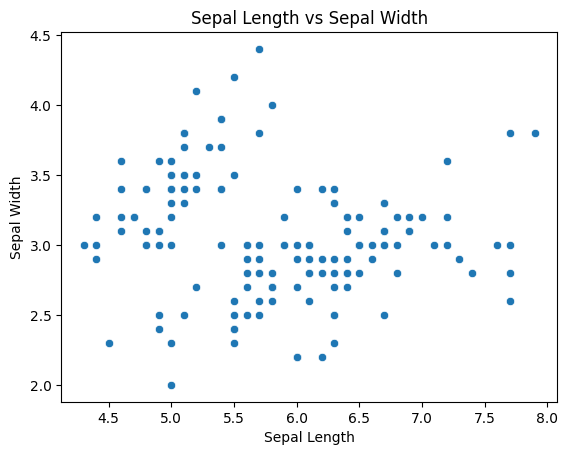

In [46]:
sns.scatterplot(data=iris, x='sepal_length', y='sepal_width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width')
plt.show()

In [56]:
data=pd.read_csv('/content/bank-full.csv')

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [58]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [59]:
#histogram

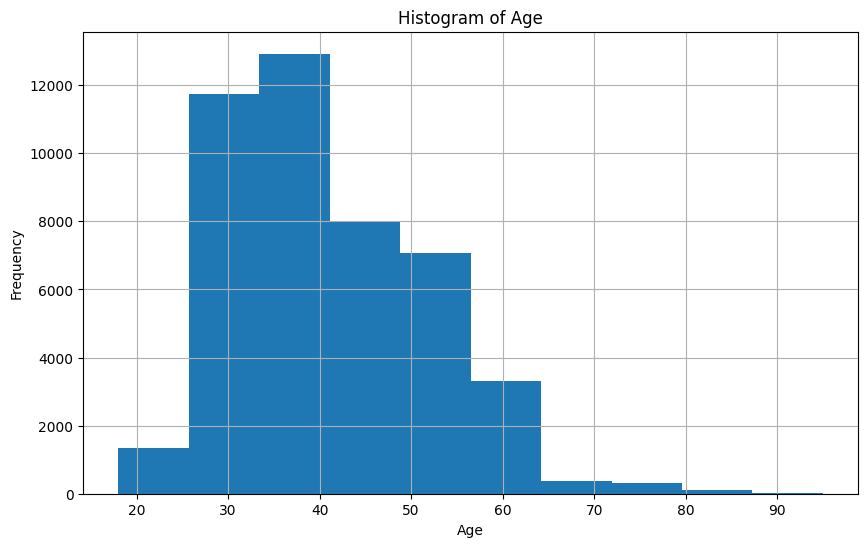

In [61]:
dt = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
plt.hist(dt['age'])
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [62]:
#boxplot

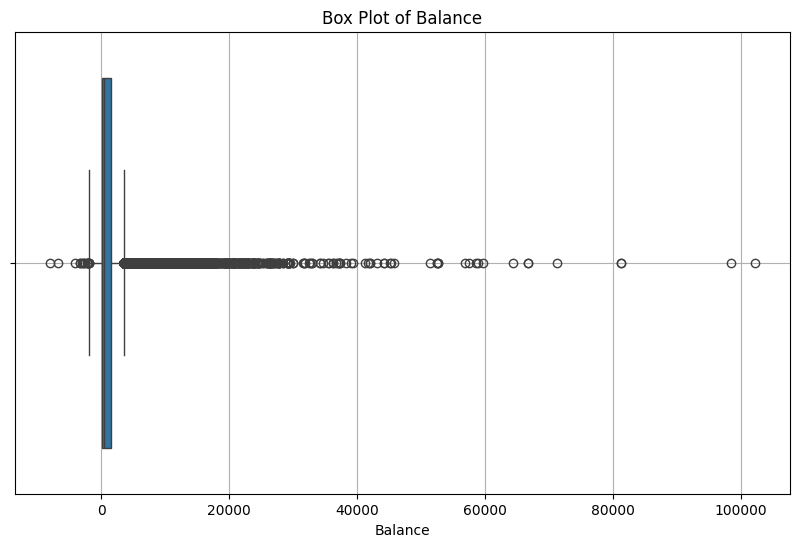

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=dt['balance'])
plt.title('Box Plot of Balance')
plt.xlabel('Balance')
plt.grid(True)
plt.show()

In [65]:
#scatter plot

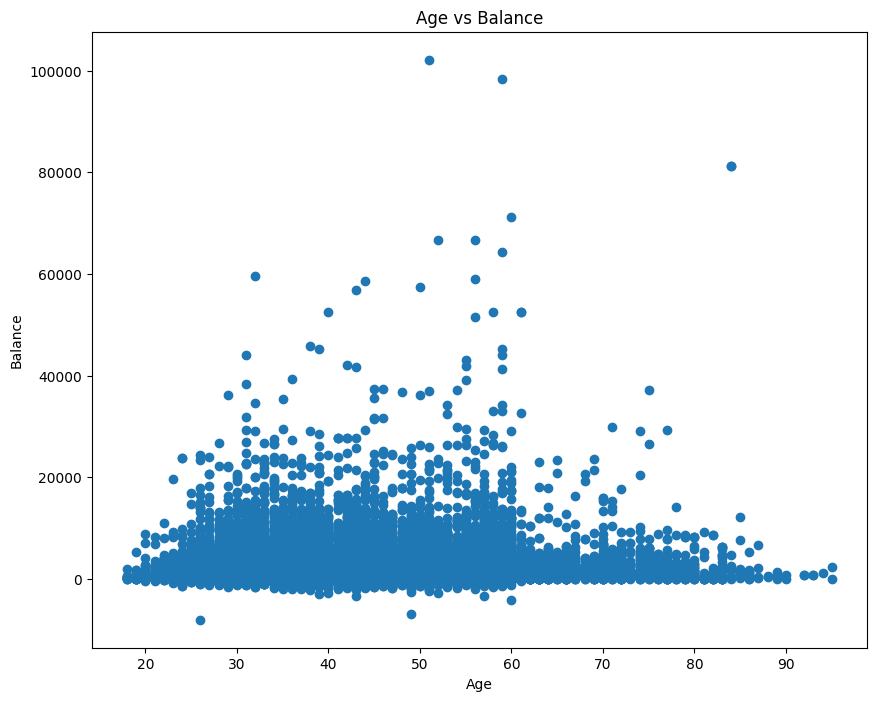

In [66]:
plt.figure(figsize=(10, 8))
plt.scatter(dt['age'], dt['balance'])
plt.title('Age vs Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()


In [ ]:
#correlation matrix

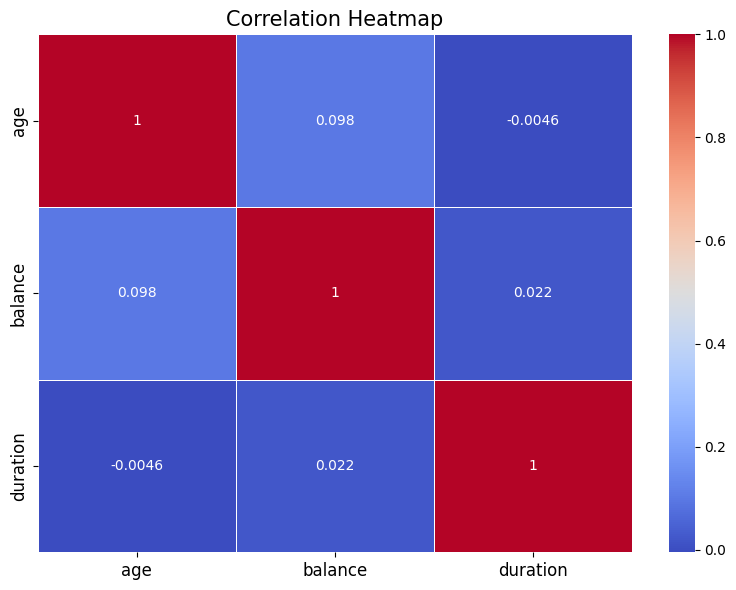

In [71]:
plt.figure(figsize=(8, 6))
dt1=dt[['age','balance','duration']]
sns.heatmap(dt1.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [72]:
#pair plot

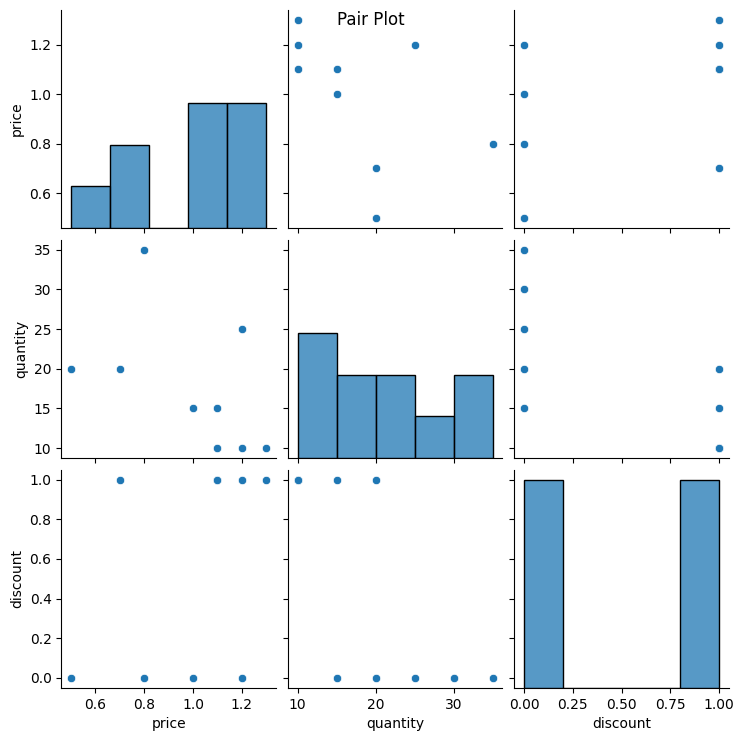

In [75]:
sns.pairplot(df)
plt.suptitle('Pair Plot')
plt.show()

In [76]:
#pie chart

In [77]:
dt['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [80]:
education_counts = dt['education'].value_counts()
print(education_counts)

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


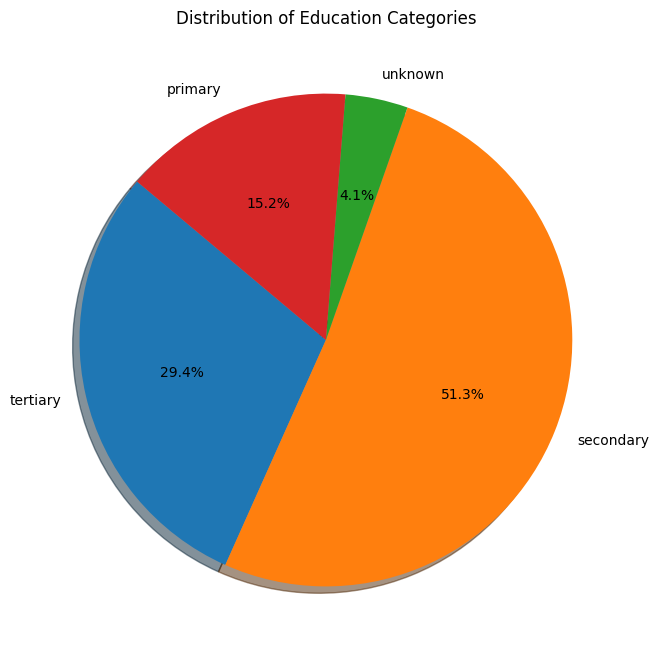

In [82]:
plt.figure(figsize=(8, 8))
category=['tertiary', 'secondary', 'unknown', 'primary']
count=[13301,23202,1857,6851]
explode = (0, 0, 0, 0)
plt.title('Distribution of Education Categories')
plt.pie(count, labels=category, explode=explode, autopct='%1.1f%%', startangle=140, shadow=True)
plt.show()
